In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-accident-united-kingdom-uk-dataset/UK_Accident.csv


In [2]:
import scipy.stats as stats
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format',lambda x: '%.2f' %x)
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
df=pd.read_csv('/kaggle/input/road-accident-united-kingdom-uk-dataset/UK_Accident.csv',parse_dates=['Date','Time'])

**Data preprocessing**

In [5]:
df.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Unnamed: 0                                   1504150 non-null  int64         
 1   Accident_Index                               1504150 non-null  object        
 2   Location_Easting_OSGR                        1504049 non-null  float64       
 3   Location_Northing_OSGR                       1504150 non-null  float64       
 4   Longitude                                    1504049 non-null  float64       
 5   Latitude                                     1504150 non-null  float64       
 6   Police_Force                                 1504150 non-null  int64         
 7   Accident_Severity                            1504150 non-null  int64         
 8   Number_of_Vehicles                           1504150

In [7]:
df.drop(columns=['Unnamed: 0', 'Location_Easting_OSGR','Location_Northing_OSGR','LSOA_of_Accident_Location','Local_Authority_(Highway)'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 28 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Accident_Index                               1504150 non-null  object        
 1   Longitude                                    1504049 non-null  float64       
 2   Latitude                                     1504150 non-null  float64       
 3   Police_Force                                 1504150 non-null  int64         
 4   Accident_Severity                            1504150 non-null  int64         
 5   Number_of_Vehicles                           1504150 non-null  int64         
 6   Number_of_Casualties                         1504150 non-null  int64         
 7   Date                                         1504150 non-null  datetime64[ns]
 8   Day_of_Week                                  1504150

In [9]:
df.head(5)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,200501BS00001,-0.19,51.49,1,2,1,1,2005-04-01,3,2023-04-05 17:42:00,12,3,3218,Single carriageway,30,None,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005
1,200501BS00002,-0.21,51.52,1,3,1,1,2005-05-01,4,2023-04-05 17:36:00,12,4,450,Dual carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
2,200501BS00003,-0.21,51.53,1,3,2,1,2005-06-01,5,2023-04-05 00:15:00,12,5,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
3,200501BS00004,-0.17,51.48,1,3,1,1,2005-07-01,6,2023-04-05 10:35:00,12,3,3220,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005
4,200501BS00005,-0.16,51.50,1,3,1,1,2005-10-01,2,2023-04-05 21:13:00,12,6,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005


In [10]:
df.isnull().sum() / len(df) * 100

Accident_Index                                0.00
Longitude                                     0.01
Latitude                                      0.00
Police_Force                                  0.00
Accident_Severity                             0.00
Number_of_Vehicles                            0.00
Number_of_Casualties                          0.00
Date                                          0.00
Day_of_Week                                   0.00
Time                                          0.01
Local_Authority_(District)                    0.00
1st_Road_Class                                0.00
1st_Road_Number                               0.00
Road_Type                                     0.00
Speed_limit                                   0.00
Junction_Control                              0.00
2nd_Road_Class                                0.00
2nd_Road_Number                               0.00
Pedestrian_Crossing-Human_Control             0.00
Pedestrian_Crossing-Physical_Fa

In [11]:
df.dropna(subset=['Longitude','Time','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities'],inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503890 entries, 0 to 1504149
Data columns (total 28 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Accident_Index                               1503890 non-null  object        
 1   Longitude                                    1503890 non-null  float64       
 2   Latitude                                     1503890 non-null  float64       
 3   Police_Force                                 1503890 non-null  int64         
 4   Accident_Severity                            1503890 non-null  int64         
 5   Number_of_Vehicles                           1503890 non-null  int64         
 6   Number_of_Casualties                         1503890 non-null  int64         
 7   Date                                         1503890 non-null  datetime64[ns]
 8   Day_of_Week                                  1503890

In [13]:
df.isnull().sum() / len(df) * 100

Accident_Index                                0.00
Longitude                                     0.00
Latitude                                      0.00
Police_Force                                  0.00
Accident_Severity                             0.00
Number_of_Vehicles                            0.00
Number_of_Casualties                          0.00
Date                                          0.00
Day_of_Week                                   0.00
Time                                          0.00
Local_Authority_(District)                    0.00
1st_Road_Class                                0.00
1st_Road_Number                               0.00
Road_Type                                     0.00
Speed_limit                                   0.00
Junction_Control                              0.00
2nd_Road_Class                                0.00
2nd_Road_Number                               0.00
Pedestrian_Crossing-Human_Control             0.00
Pedestrian_Crossing-Physical_Fa

In [14]:
duplicate_rows=df[df.duplicated()]
print("Number of duplicate rows: ",duplicate_rows.shape[0])

Number of duplicate rows:  34155


In [15]:
df.drop_duplicates(inplace=True)
print("Updated number of rows:",df.shape[0])

Updated number of rows: 1469735


In [16]:
df.describe(include=np.number)

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00
mean,-1.43,52.58,30.78,2.84,1.83,1.35,4.12,353.52,4.09,1008.85,39.08,2.66,380.11,1.36,2009.31
std,1.40,1.45,25.51,0.40,0.72,0.83,1.92,259.24,1.43,1821.62,14.17,3.21,1300.94,0.48,3.02
min,-7.52,49.91,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-1.00,10.00,-1.00,-1.00,1.00,2005.00
25%,-2.36,51.49,7.00,3.00,1.00,1.00,2.00,122.00,3.00,0.00,30.00,-1.00,0.00,1.00,2006.00
50%,-1.39,52.28,31.00,3.00,2.00,1.00,4.00,328.00,4.00,129.00,30.00,3.00,0.00,1.00,2010.00
75%,-0.22,53.46,46.00,3.00,2.00,1.00,6.00,531.00,6.00,726.00,50.00,6.00,0.00,2.00,2012.00
max,1.76,60.76,98.00,3.00,67.00,93.00,7.00,941.00,6.00,9999.00,70.00,6.00,9999.00,3.00,2014.00


In [17]:
df.describe(include=np.object)

,Accident_Index,Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident
count,1469735,1469735,1469735,1469735,1469735,1469735,1469735,1469735,1469735,1469735,1469735
unique,927301,6,5,3,6,5,9,6,8,6,2
top,2.01E+12,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,Yes
freq,370206,1100480,715644,1461091,1225277,1077129,1176480,1011352,1433816,1442968,1190075


In [18]:
numerical_data=df.select_dtypes(include='number')
num_cols=numerical_data.columns
len(num_cols)

15

In [19]:
categorical_data=df.select_dtypes(include='object')
cat_cols=categorical_data.columns
len(cat_cols)

11

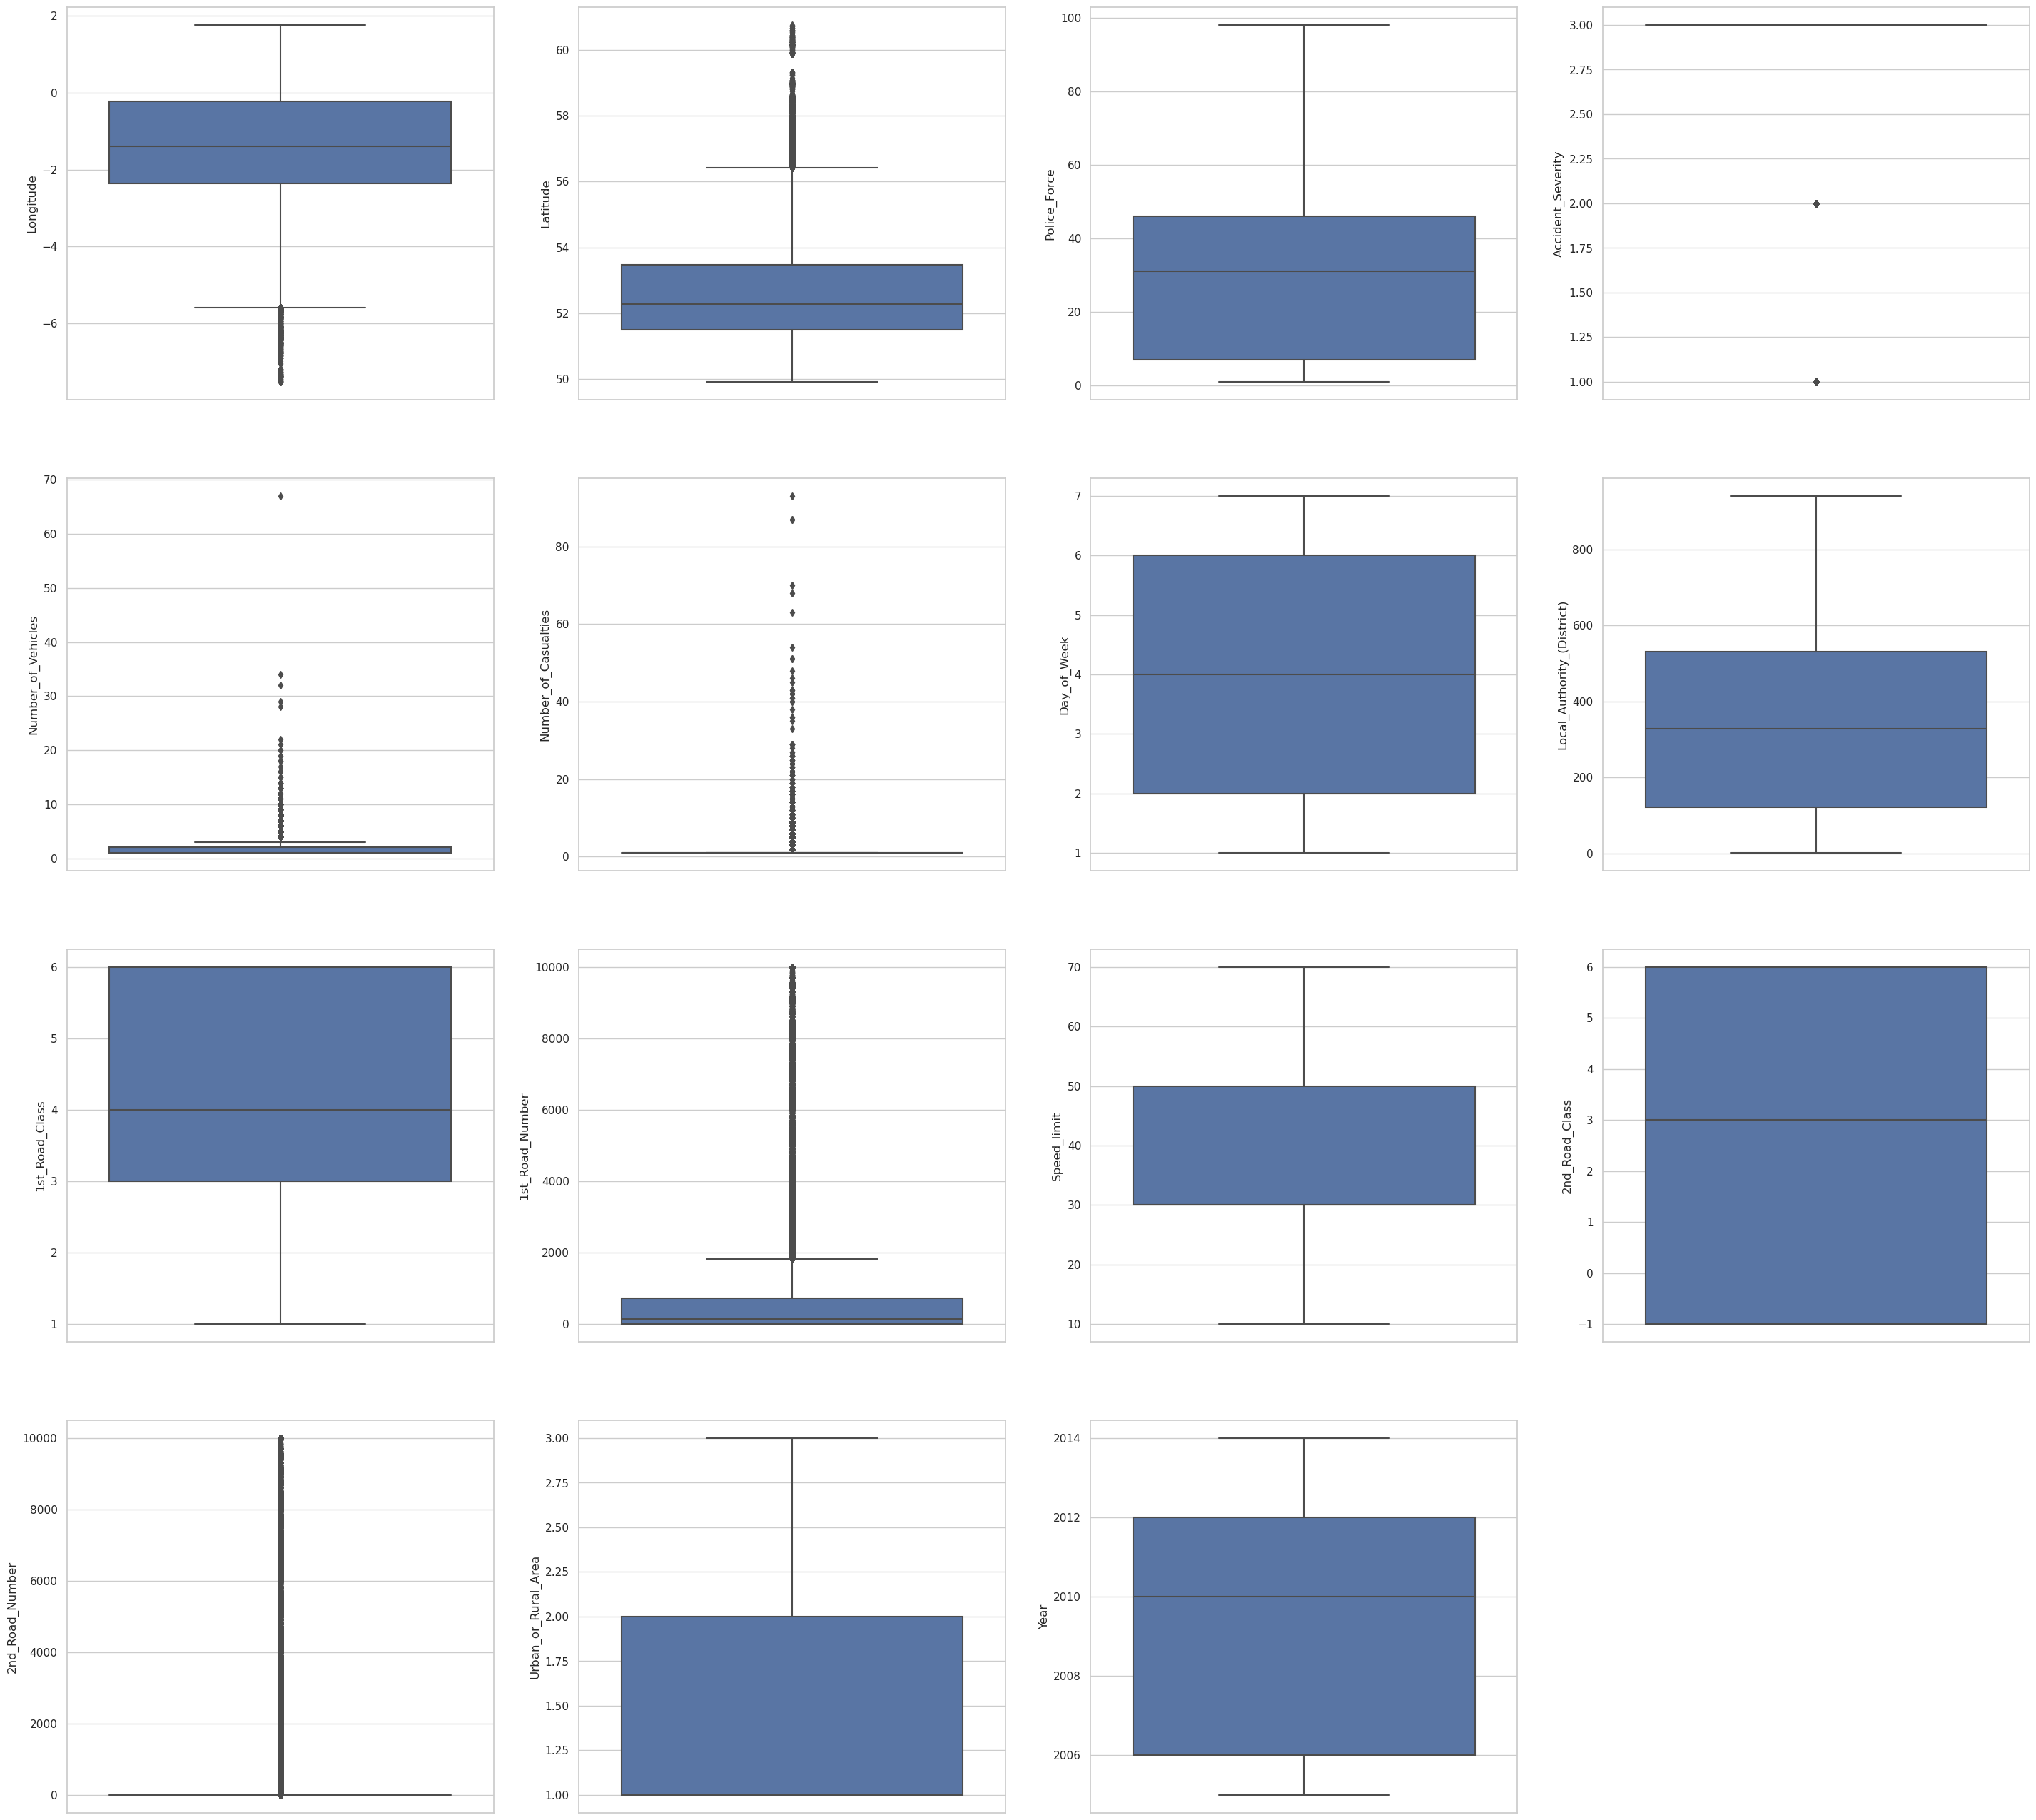

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


In [20]:
sns.set(style='whitegrid')
fig=plt.figure(figsize=(20,50))
fig.subplots_adjust(right=1.5)

for plot in range (1, len(num_cols)+1):
    plt.subplot(6,4,plot)
    sns.boxplot(y=df[num_cols[plot-1]])
    
plt.show()
%time

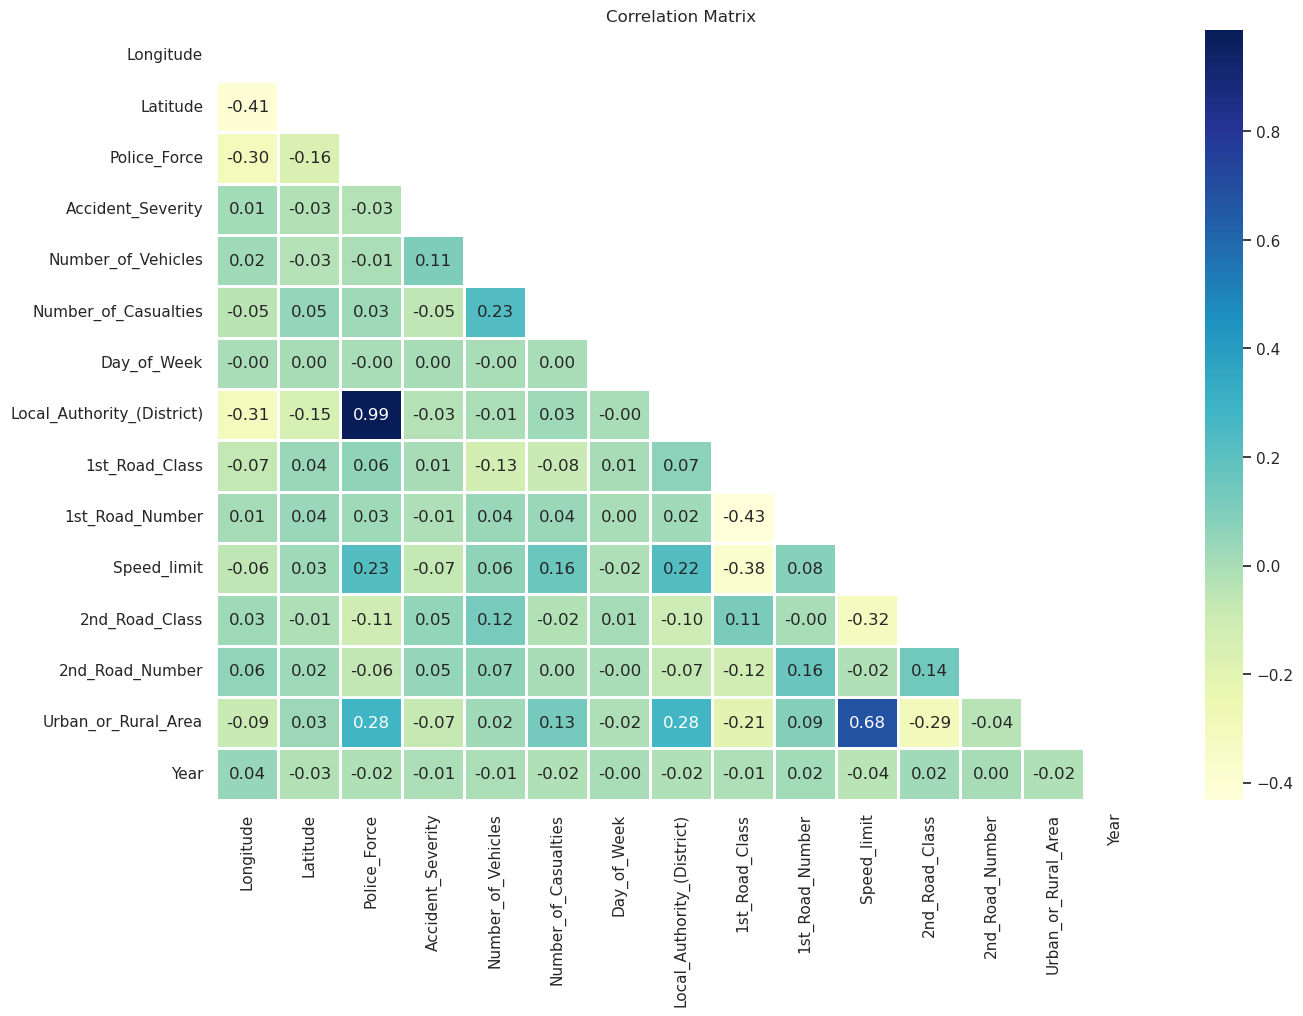

In [21]:
plt.figure(figsize=(15,10))
corr=df.corr(method='spearman')
mask=np.triu(np.ones_like(corr,dtype=bool))
cormat=sns.heatmap(corr,mask=mask,annot=True,cmap='YlGnBu',linewidths=1,fmt='.2f')
cormat.set_title('Correlation Matrix')
plt.show()

In [22]:
def get_corr(data,threshold):
    corr_col=set()
    cormat=data.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i,j])>threshold:
                col_name=cormat.columns[i]
                corr_col.add(col_name)
    return corr_col

corr_features=get_corr(df,0.80)
print(corr_features)

{'Local_Authority_(District)'}


In [23]:
df.drop(columns=['Local_Authority_(District)'],axis=1,inplace=True)

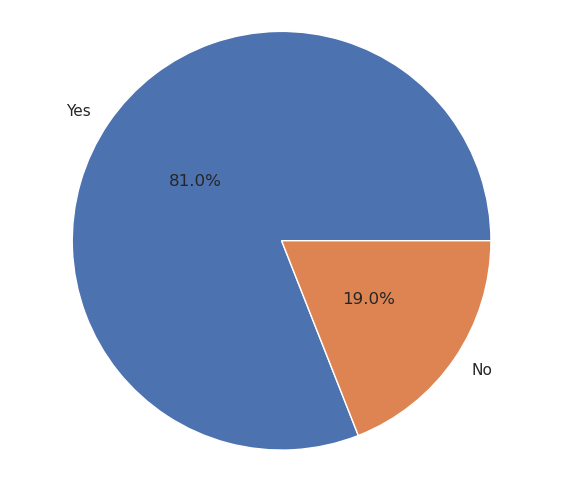

In [24]:
def pie_chart(data,col):
    x=data[col].value_counts().values
    plt.figure(figsize=(7,6))
    plt.pie(x,center=(0,0),radius=1.5,labels=data[col].unique(),autopct='%1.1f%%',pctdistance=0.5)
    plt.axis('equal')
    plt.show()
    
pie_lst=['Did_Police_Officer_Attend_Scene_of_Accident']
for col in pie_lst:
    pie_chart(df,col)

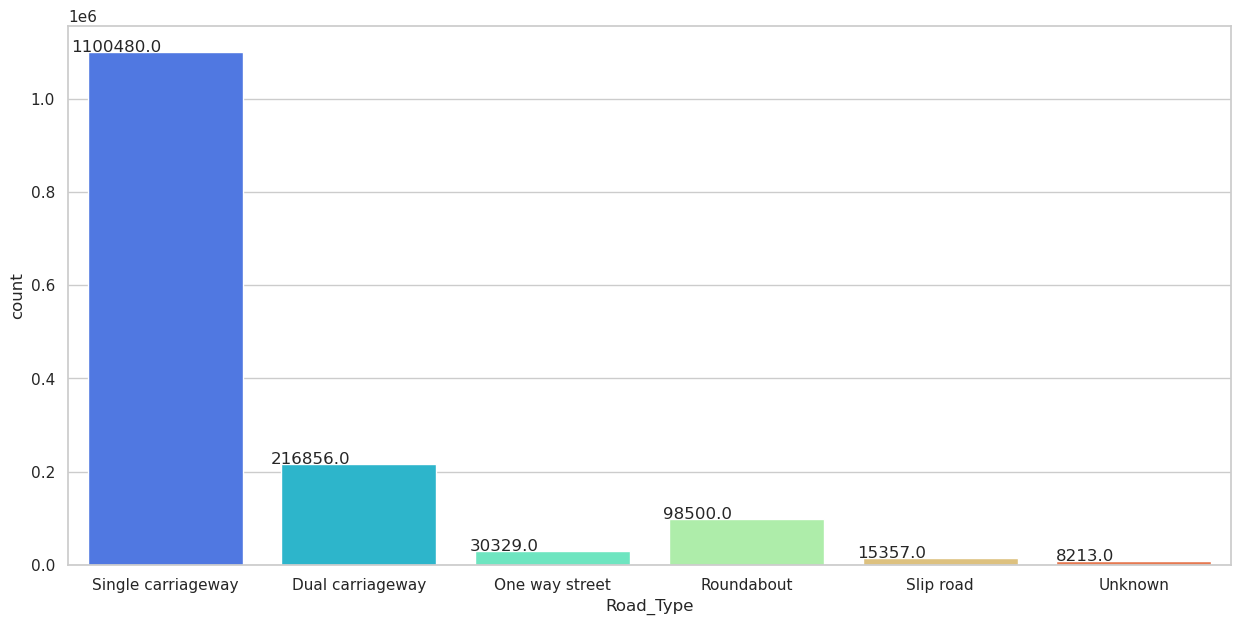

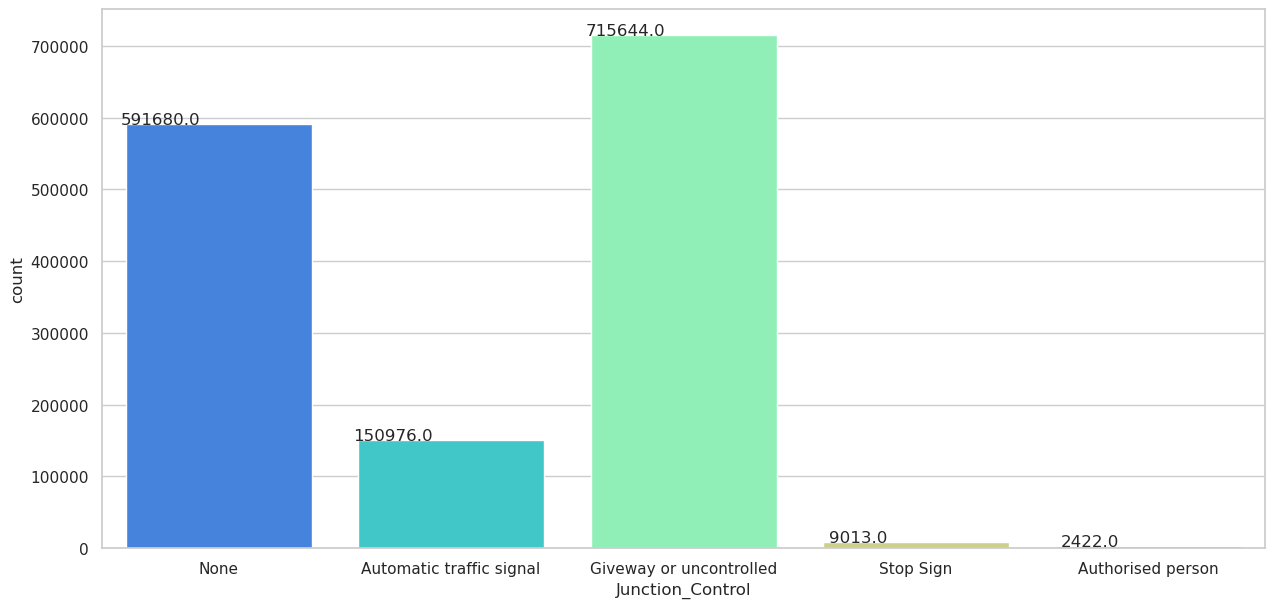

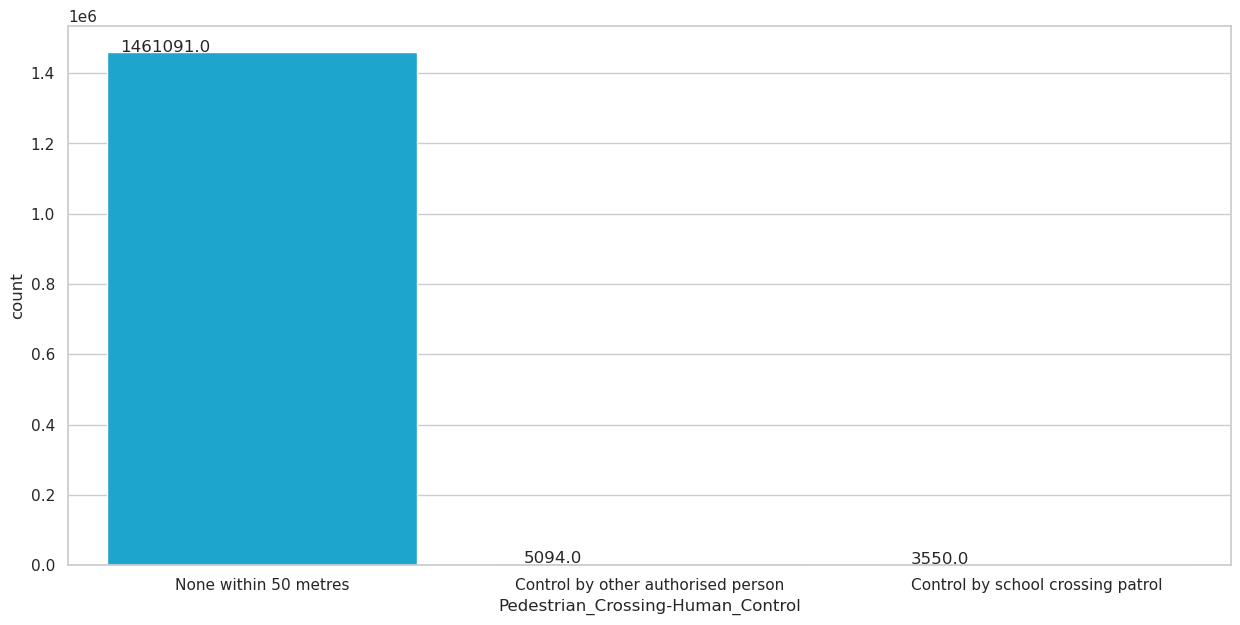

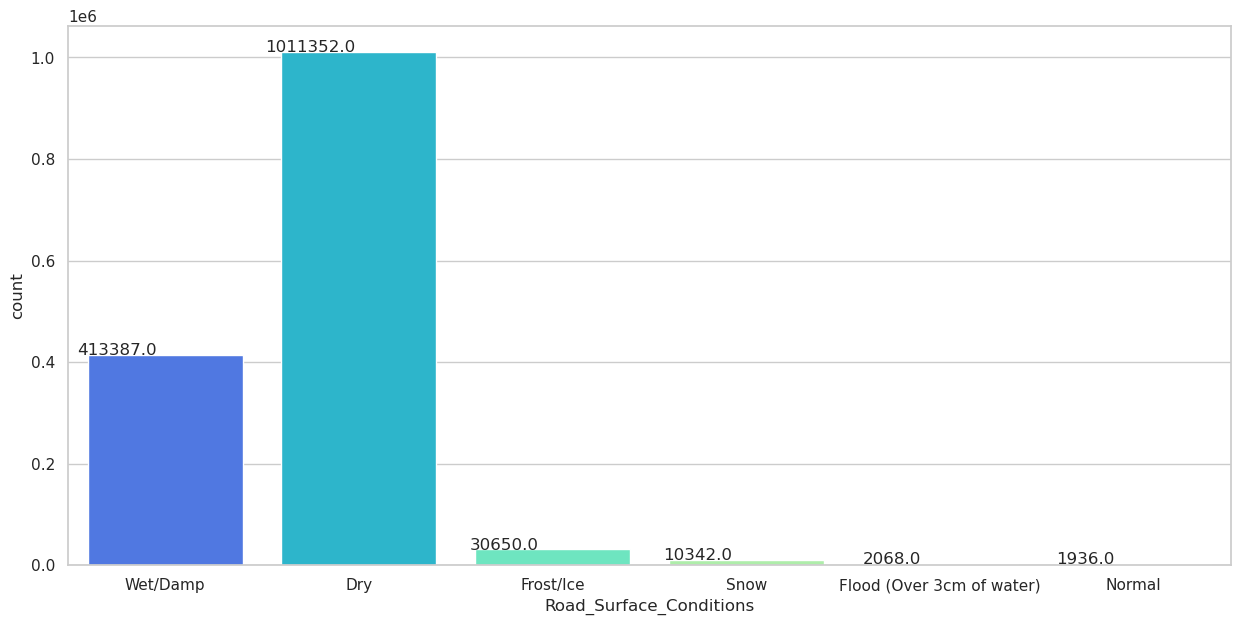

In [25]:
def cnt_plot(data,col):
    plt.figure(figsize=(15,7))
    ax1 = sns.countplot(x=col, data=data,palette='rainbow')

    for p in ax1.patches:
        ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1), ha='center')

    plt.show()

    print('\n')

cnt_lst1 = ['Road_Type', 'Junction_Control',
           'Pedestrian_Crossing-Human_Control',
           'Road_Surface_Conditions']

for col in cnt_lst1:
    cnt_plot(df, col)

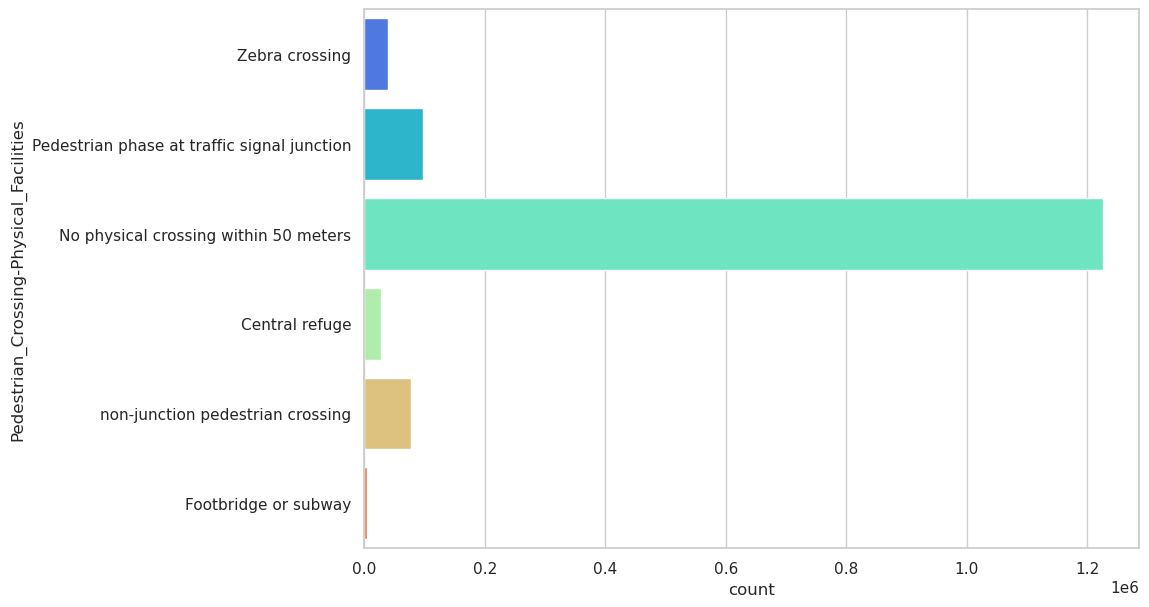

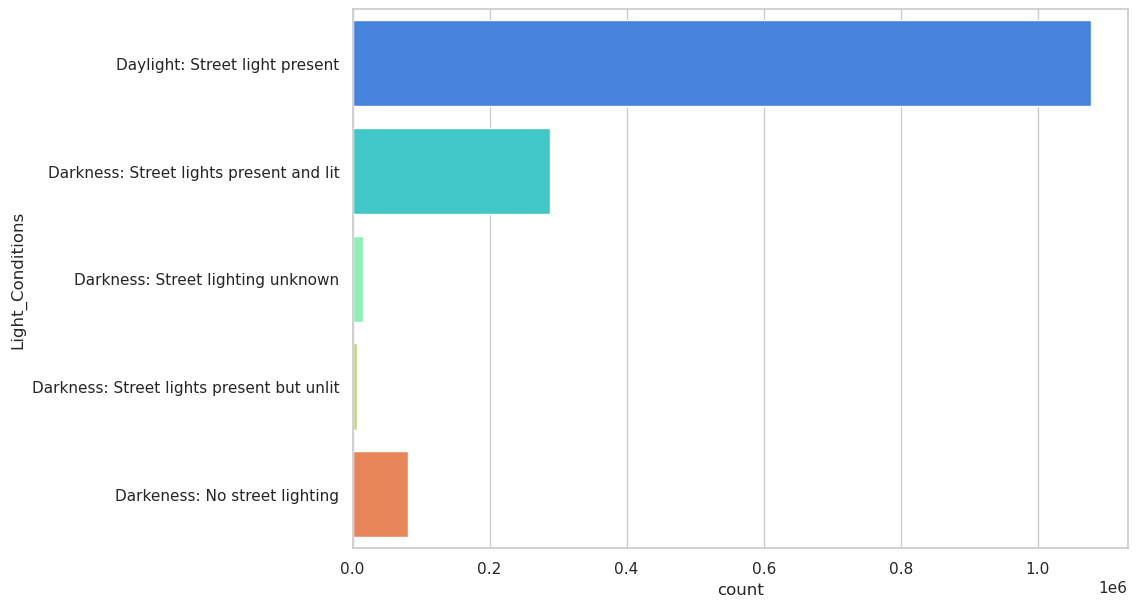

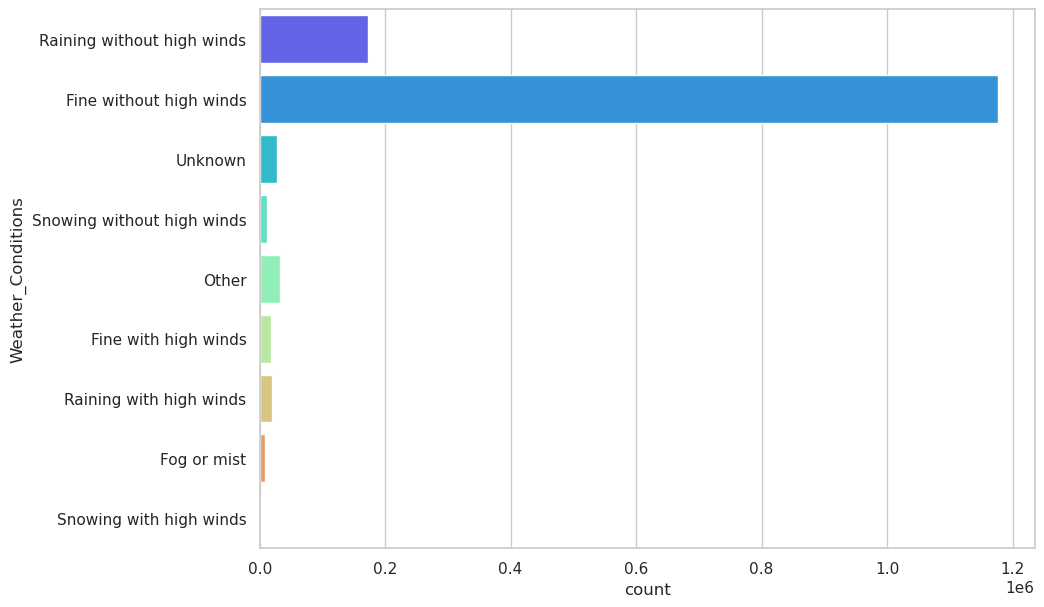

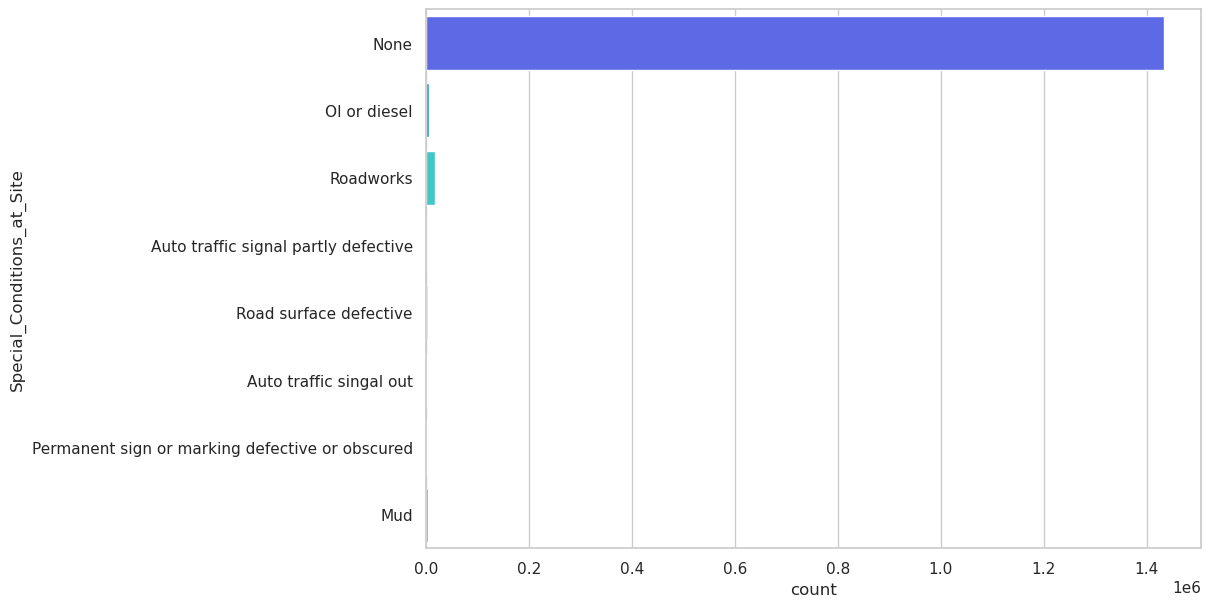

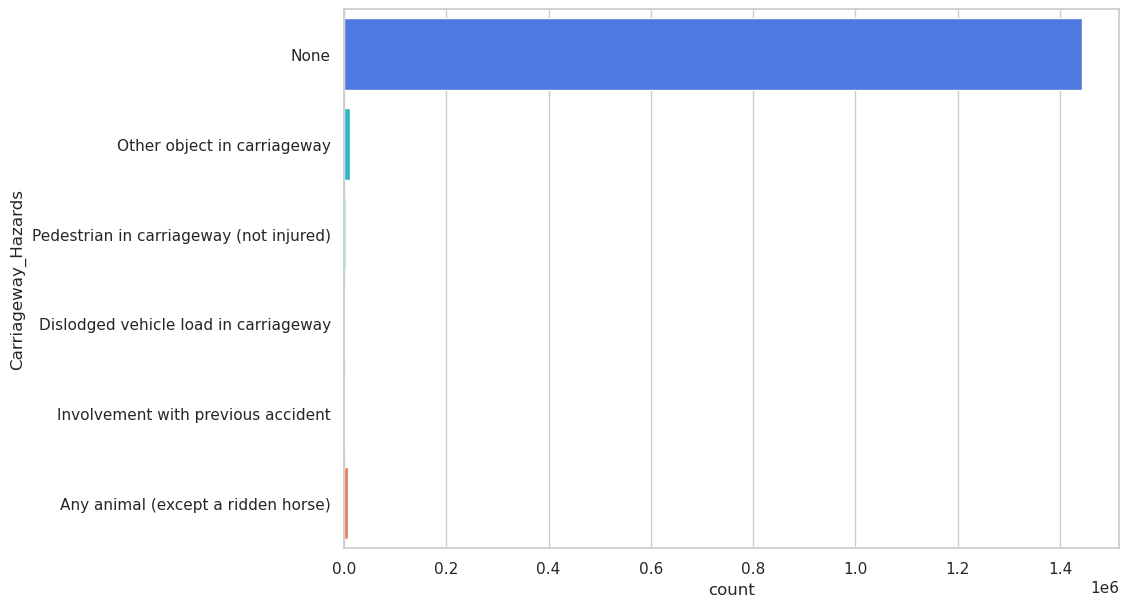

In [26]:
def cnt_plot(data, col):
  plt.figure(figsize=(10, 7))
  sns.countplot(y=col, data=data,palette='rainbow')
  plt.show()

  print('\n')
  
cnt_lst2 = ['Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
            'Weather_Conditions',
            'Special_Conditions_at_Site', 'Carriageway_Hazards']

for col in cnt_lst2:
  cnt_plot(df, col)

In [27]:
df.head()

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,200501BS00001,-0.19,51.49,1,2,1,1,2005-04-01,3,2023-04-05 17:42:00,3,3218,Single carriageway,30,None,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005
1,200501BS00002,-0.21,51.52,1,3,1,1,2005-05-01,4,2023-04-05 17:36:00,4,450,Dual carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
2,200501BS00003,-0.21,51.53,1,3,2,1,2005-06-01,5,2023-04-05 00:15:00,5,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
3,200501BS00004,-0.17,51.48,1,3,1,1,2005-07-01,6,2023-04-05 10:35:00,3,3220,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005
4,200501BS00005,-0.16,51.50,1,3,1,1,2005-10-01,2,2023-04-05 21:13:00,6,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005


In [28]:
df.columns

Index(['Accident_Index', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Year'],
      dtype='object')

In [29]:
df['Urban_or_Rural_Area'].value_counts()

1    945654
2    524046
3        35
Name: Urban_or_Rural_Area, dtype: int64

In [30]:
df['Urban_or_Rural_Area'].replace(3,1,inplace=True)

In [31]:
df['Urban_or_Rural_Area'].value_counts()

1    945689
2    524046
Name: Urban_or_Rural_Area, dtype: int64

In [32]:
df['Accident_Severity'].value_counts()

3    1251820
2     198876
1      19039
Name: Accident_Severity, dtype: int64

In [33]:
df['Number_of_Vehicles'].value_counts()[:10]

2     873497
1     445264
3     117598
4      24975
5       5536
6       1704
7        600
8        287
9        130
10        63
Name: Number_of_Vehicles, dtype: int64

In [34]:
df['Number_of_Casualties'].value_counts()[:10]

1     1127319
2      235991
3       67298
4       24406
5        9001
6        3385
7        1129
8         496
9         237
10        131
Name: Number_of_Casualties, dtype: int64

In [35]:
dt1=df.groupby('Date')['Accident_Index'].count()\
.reset_index()\
.rename(columns={'Accident_Index':'No. of Accidents'})

fig=px.line(dt1,x='Date',y='No. of Accidents', labels={'index':'Date','value':'No. of accidents'})
fig.show()

In [36]:
dt2=df.groupby('Year')['Accident_Index'].count()\
.reset_index()\
.rename(columns={'Accident_Index':'No. of Accidents'})

fig=px.line(dt2,x='Year',y='No. of Accidents',labels={'index':'Year','value':'No. of Accidents'})
fig.show()

In [37]:
dt3=df.groupby('Day_of_Week')['Accident_Index'].count()\
.reset_index()\
.rename(columns={'Accident_Index':'No. of Accidents'})

fig=px.line(dt3,x='Day_of_Week',y='No. of Accidents',labels={'index':'Day_of_Week','value':'No. of Accidents'})
fig.show()

In [38]:
cat_cols

Index(['Accident_Index', 'Road_Type', 'Junction_Control',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

In [39]:
len(df['Accident_Index'].unique())
df.drop('Accident_Index',axis=1,inplace=True)

In [40]:
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.19,51.49,1,2,1,1,2005-04-01,3,2023-04-05 17:42:00,3,3218,Single carriageway,30,None,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005
1,-0.21,51.52,1,3,1,1,2005-05-01,4,2023-04-05 17:36:00,4,450,Dual carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
2,-0.21,51.53,1,3,2,1,2005-06-01,5,2023-04-05 00:15:00,5,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
3,-0.17,51.48,1,3,1,1,2005-07-01,6,2023-04-05 10:35:00,3,3220,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005
4,-0.16,51.50,1,3,1,1,2005-10-01,2,2023-04-05 21:13:00,6,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005


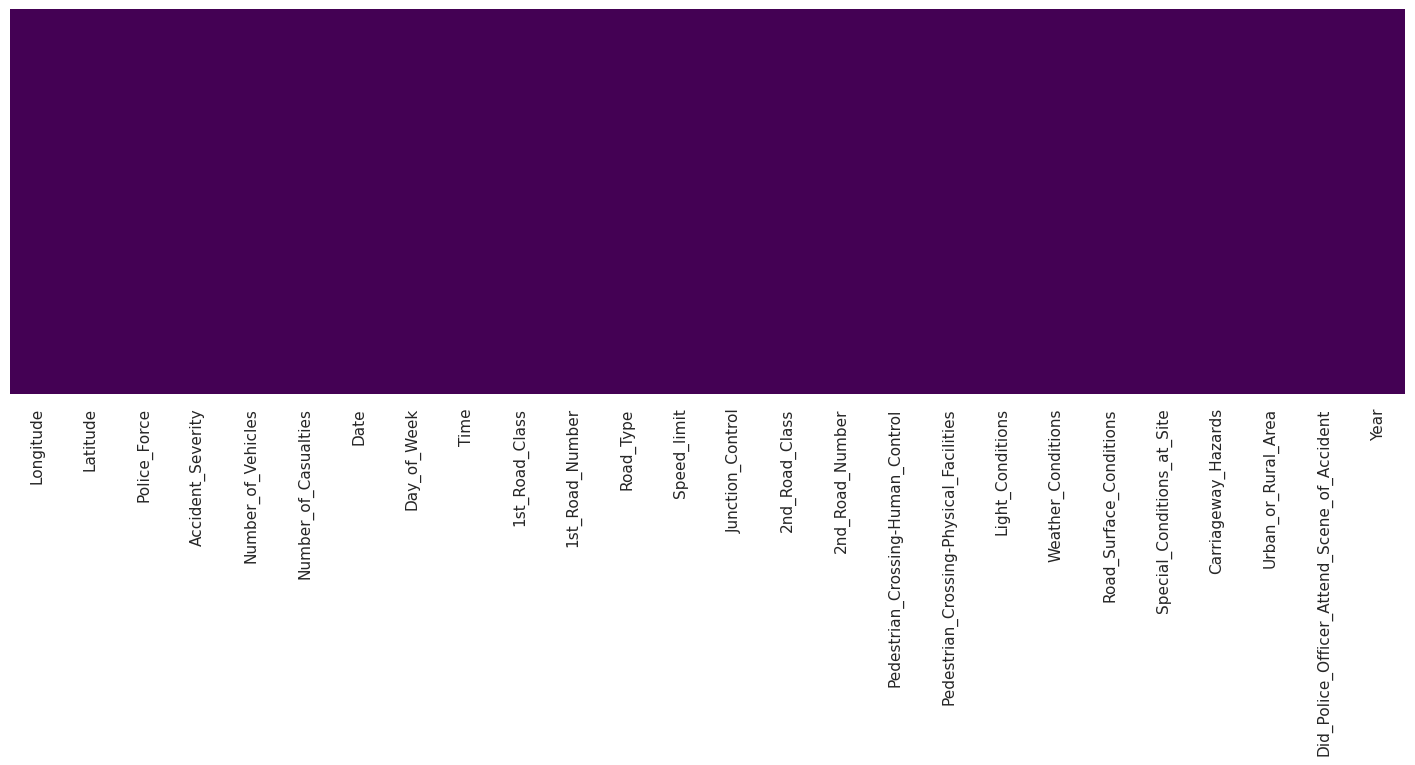

In [41]:
plt.figure(figsize=(18,5))
sns.heatmap(df.isna(),yticklabels=False, cbar=False, cmap='viridis')
plt.show()

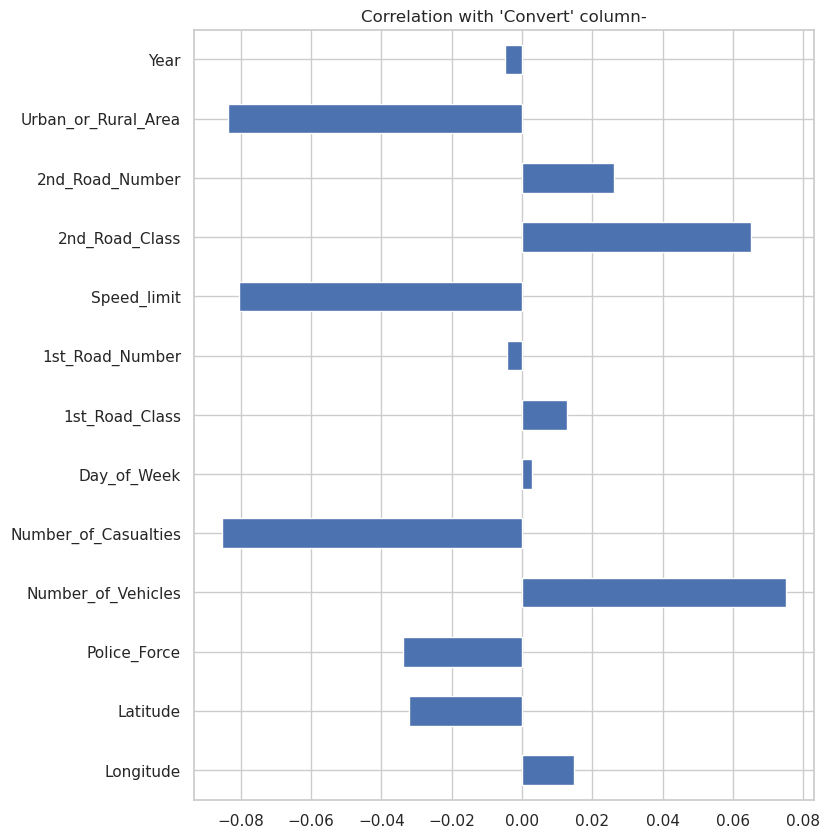

In [42]:
X=df.drop(columns=['Accident_Severity'],axis=1)

plt.figure(figsize=(8,10))
X.corrwith(df['Accident_Severity']).plot(kind='barh',title="Correlation with 'Convert' column-")

plt.show()

In [43]:
cat_cols=[feature for feature in df.columns if df[feature].dtype=='O']


In [44]:
print(cat_cols)

['Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident']


In [45]:
for feature in cat_cols:
    print(f'The {feature} has {len(df[feature].unique())} number of categories.' )

The Road_Type has 6 number of categories.
The Junction_Control has 5 number of categories.
The Pedestrian_Crossing-Human_Control has 3 number of categories.
The Pedestrian_Crossing-Physical_Facilities has 6 number of categories.
The Light_Conditions has 5 number of categories.
The Weather_Conditions has 9 number of categories.
The Road_Surface_Conditions has 6 number of categories.
The Special_Conditions_at_Site has 8 number of categories.
The Carriageway_Hazards has 6 number of categories.
The Did_Police_Officer_Attend_Scene_of_Accident has 2 number of categories.


**Label Encoding**

In [46]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [47]:
for feature in cat_cols:
    df[feature]=labelencoder.fit_transform(df[feature])

In [48]:
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.19,51.49,1,2,1,1,2005-04-01,3,2023-04-05 17:42:00,3,3218,3,30,3,-1,0,2,4,4,5,5,3,3,1,1,2005
1,-0.21,51.52,1,3,1,1,2005-05-01,4,2023-04-05 17:36:00,4,450,0,30,1,5,0,2,3,2,1,0,3,3,1,1,2005
2,-0.21,51.53,1,3,2,1,2005-06-01,5,2023-04-05 00:15:00,5,0,3,30,3,-1,0,2,2,2,1,0,3,3,1,1,2005
3,-0.17,51.48,1,3,1,1,2005-07-01,6,2023-04-05 10:35:00,3,3220,3,30,3,-1,0,2,2,4,1,0,3,3,1,1,2005
4,-0.16,51.50,1,3,1,1,2005-10-01,2,2023-04-05 21:13:00,6,0,3,30,3,-1,0,2,2,1,1,5,3,3,1,1,2005


In [49]:
df.drop('Year',axis=1, inplace=True)

In [50]:
df["day"]=df['Date'].map(lambda x:x.day)
df["month"]=df['Date'].map(lambda x:x.month)
df["year"]=df['Date'].map(lambda x:x.year)

In [51]:
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,day,month,year
0,-0.19,51.49,1,2,1,1,2005-04-01,3,2023-04-05 17:42:00,3,3218,3,30,3,-1,0,2,4,4,5,5,3,3,1,1,1,4,2005
1,-0.21,51.52,1,3,1,1,2005-05-01,4,2023-04-05 17:36:00,4,450,0,30,1,5,0,2,3,2,1,0,3,3,1,1,1,5,2005
2,-0.21,51.53,1,3,2,1,2005-06-01,5,2023-04-05 00:15:00,5,0,3,30,3,-1,0,2,2,2,1,0,3,3,1,1,1,6,2005
3,-0.17,51.48,1,3,1,1,2005-07-01,6,2023-04-05 10:35:00,3,3220,3,30,3,-1,0,2,2,4,1,0,3,3,1,1,1,7,2005
4,-0.16,51.50,1,3,1,1,2005-10-01,2,2023-04-05 21:13:00,6,0,3,30,3,-1,0,2,2,1,1,5,3,3,1,1,1,10,2005


In [52]:
df.drop("Date",axis=1,inplace=True)
df.drop("Time",axis=1,inplace=True)

In [53]:
df['Accident_Severity']=df['Accident_Severity'].map({1:0,2:1,3:2})

In [54]:
dfnew=df[['Latitude','Longitude','day','month','1st_Road_Number','year','Day_of_Week','Accident_Severity']]

In [55]:
df.columns

Index(['Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'day', 'month', 'year'],
      dtype='object')

In [56]:
dfnew.head()

,Latitude,Longitude,day,month,1st_Road_Number,year,Day_of_Week,Accident_Severity
0,51.49,-0.19,1,4,3218,2005,3,1
1,51.52,-0.21,1,5,450,2005,4,2
2,51.53,-0.21,1,6,0,2005,5,2
3,51.48,-0.17,1,7,3220,2005,6,2
4,51.50,-0.16,1,10,0,2005,2,2


In [57]:
from sklearn.preprocessing import StandardScaler
features=[feature for feature in dfnew.columns if feature!='Accident_Severity']
x=dfnew.iloc[0:50000,:-1]
y=dfnew.iloc[0:50000,[-1]]
x=StandardScaler().fit_transform(x)

In [58]:
%%time
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
oversample=RandomOverSampler()
x,y=oversample.fit_resample(x,y)

CPU times: user 281 ms, sys: 62.5 ms, total: 343 ms
Wall time: 648 ms


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(x_train, y_train)

ExtraTreesClassifier()

In [61]:
preds=clf.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_test,preds)
print(score)

0.9849930949823539


In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score

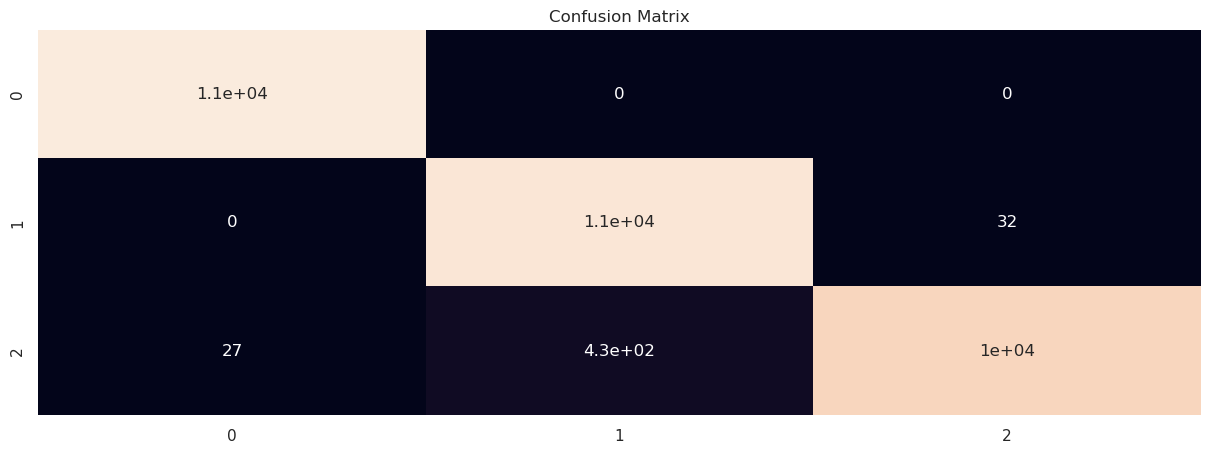

In [64]:
fig=plt.figure(figsize=(15,5))
conmat=confusion_matrix(y_test,preds)
sns.heatmap(conmat,annot=True,cbar=False)
plt.title("Confusion Matrix")
plt.show()

In [65]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10949
           1       0.96      1.00      0.98     10840
           2       1.00      0.96      0.98     10796

    accuracy                           0.98     32585
   macro avg       0.99      0.98      0.98     32585
weighted avg       0.99      0.98      0.98     32585

